In [2]:
!pip install imblearn

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# Makes sure we see all columns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

class DataLoader():
    def __init__(self):
        self.data = None

    def load_dataset(self, path="data/healthcare-dataset-stroke-data.csv"):
        self.data = pd.read_csv(path)

    def preprocess_data(self):
        # One-hot encode all categorical columns
        categorical_cols = ["gender",
                            "ever_married",
                            "work_type",
                            "Residence_type",
                            "smoking_status"]
        encoded = pd.get_dummies(self.data[categorical_cols], 
                                prefix=categorical_cols)

        # Update data with new columns
        self.data = pd.concat([encoded, self.data], axis=1)
        self.data.drop(categorical_cols, axis=1, inplace=True)

        # Impute missing values of BMI
        self.data.bmi = self.data.bmi.fillna(0)
        
        # Drop id as it is not relevant
        self.data.drop(["id"], axis=1, inplace=True)

        # Standardization 
        # Usually we would standardize here and convert it back later
        # But for simplification we will not standardize / normalize the features

    def get_data_split(self):
        X = self.data.iloc[:,:-1]
        y = self.data.iloc[:,-1]
        return train_test_split(X, y, test_size=0.20, random_state=2021)
    
    def oversample(self, X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='minority')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over
    
def get_unique_vals(data):
    for column in data:
        try:
            unique_vals = np.unique(data[column])
        except:
            unique_vals = data[column].unique()

        nr_values = len(unique_vals)
        if nr_values < 10:
            print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
        else:
            print('The number of values for feature {} :{}'.format(column, nr_values))


  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [3]:
df = pd.read_csv('./Covid Data.csv')
df["DEATH"] = [0 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

In [4]:
df[df.DEATH==1].shape

(76942, 22)

In [5]:
df[df.DEATH==0].shape

(971633, 22)

In [6]:
print('Percentage of missing values')
for col in df.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(df[(df[col]==98) | (df[col]==99) | (df[col]==97)])/len(df)*100))

Percentage of missing values
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>      50.28%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%
DEATH                =>       0.00%


In [7]:
df=df.drop(columns=['INTUBED','ICU','DATE_DIED'],axis=0)
get_unique_vals(df)

The number of values for feature USMER :2 -- [2 1]
The number of values for feature MEDICAL_UNIT :13
The number of values for feature SEX :2 -- [1 2]
The number of values for feature PATIENT_TYPE :2 -- [1 2]
The number of values for feature PNEUMONIA :3 -- [ 1  2 99]
The number of values for feature AGE :121
The number of values for feature PREGNANT :4 -- [ 2 97 98  1]
The number of values for feature DIABETES :3 -- [ 2  1 98]
The number of values for feature COPD :3 -- [ 2  1 98]
The number of values for feature ASTHMA :3 -- [ 2  1 98]
The number of values for feature INMSUPR :3 -- [ 2  1 98]
The number of values for feature HIPERTENSION :3 -- [ 1  2 98]
The number of values for feature OTHER_DISEASE :3 -- [ 2  1 98]
The number of values for feature CARDIOVASCULAR :3 -- [ 2  1 98]
The number of values for feature OBESITY :3 -- [ 2  1 98]
The number of values for feature RENAL_CHRONIC :3 -- [ 2  1 98]
The number of values for feature TOBACCO :3 -- [ 2  1 98]
The number of values for fe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   PNEUMONIA             1048575 non-null  int64
 5   AGE                   1048575 non-null  int64
 6   PREGNANT              1048575 non-null  int64
 7   DIABETES              1048575 non-null  int64
 8   COPD                  1048575 non-null  int64
 9   ASTHMA                1048575 non-null  int64
 10  INMSUPR               1048575 non-null  int64
 11  HIPERTENSION          1048575 non-null  int64
 12  OTHER_DISEASE         1048575 non-null  int64
 13  CARDIOVASCULAR        1048575 non-null  int64
 14  OBESITY               1048575 non-null  int64
 15  RENAL_CHRONIC  

In [9]:
binary = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']

for col in binary :
    df = df[(df[col] == 1)|(df[col] == 2)]

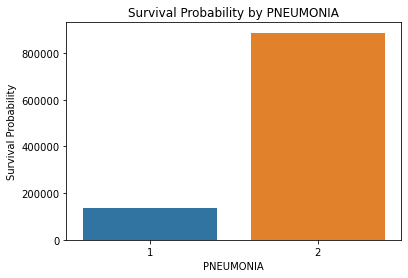

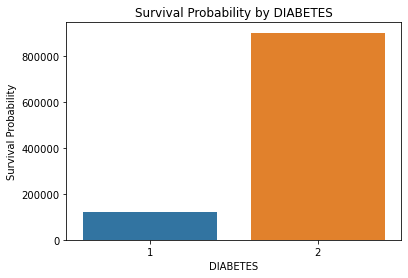

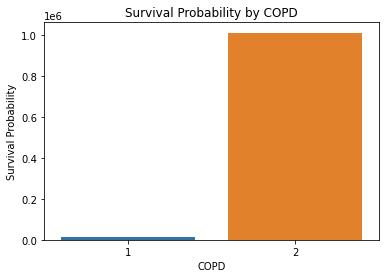

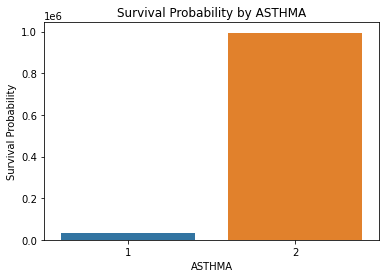

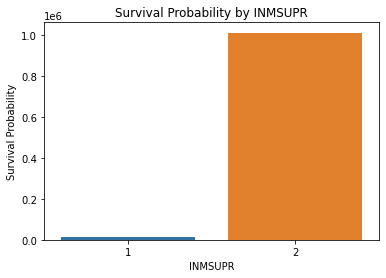

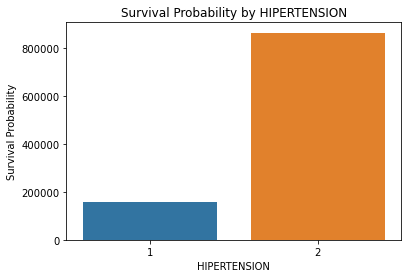

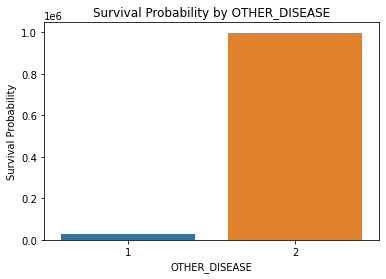

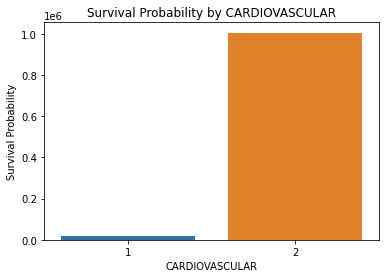

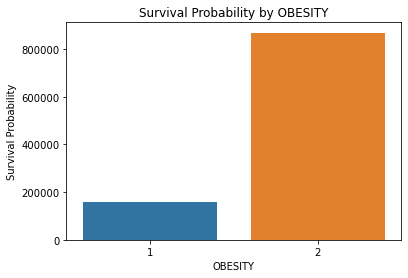

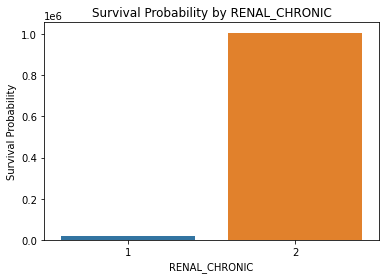

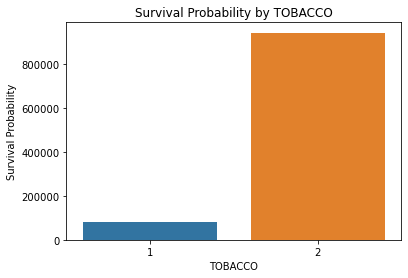

In [10]:
for i in binary:
    sns.countplot(x=df[i])
    plt.ylabel('Survival Probability')
    plt.title('Survival Probability by '+ i)
    plt.show()

In [11]:
x = df.drop(columns="DEATH")
y= df["DEATH"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",X_train.shape)
print("Test_x :",X_test.shape)
print("Train_y :",Y_train.shape)
print("Test_y :",Y_test.shape)

Train_x : (820121, 18)
Test_x : (205031, 18)
Train_y : (820121,)
Test_y : (205031,)


In [13]:
!pip install interpret


  Using cached interpret-0.3.0-py3-none-any.whl (1.4 kB)
  Using cached interpret_core-0.3.0-py3-none-any.whl (8.9 MB)
  Using cached plotly-5.13.0-py2.py3-none-any.whl (15.2 MB)
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached skope_rules-1.0.1-py3-none-any.whl (14 kB)
  Using cached salib-1.4.7-py3-none-any.whl (757 kB)
  Using cached treeinterpreter-0.2.3-py2.py3-none-any.whl (6.0 kB)
  Using cached dill-0.3.6-py3-none-any.whl (110 kB)
  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached dash_cytoscape-0.3.0-py3-none-any.whl (3.6 MB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached dash-2.7.1-py3-none-any.whl (9.9 MB)
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached multiprocess-0.70.14-py39-none-any.whl (132 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [14]:
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree, 
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

lr = LogisticRegression(random_state=2021, feature_names=X_train.columns, penalty='l1', solver='liblinear')
lr.fit(X_train, Y_train)
print("Training finished.")

Training finished.


In [15]:
# %% Evaluate logistic regression model
Y_pred = lr.predict(X_test)
print(f"F1 Score {f1_score(Y_test, Y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(Y_test, Y_pred)}")

# %% Explain local prediction
lr_local = lr.explain_local(X_test[:100], Y_test[:100], name='Logistic Regression')
show(lr_local)

# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

# %% Fit decision tree model
tree = ClassificationTree()
tree.fit(X_train, Y_train)
print("Training finished.")
y_pred = tree.predict(X_test)
print(f"F1 Score {f1_score(Y_test, Y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(Y_test, Y_pred)}")

F1 Score 0.7358589979442347
Accuracy 0.938233730509045


<!-- http://127.0.0.1:7001/2742946132032/ -->

<!-- http://127.0.0.1:7001/2742947070880/ -->

Training finished.
F1 Score 0.7358589979442347
Accuracy 0.938233730509045


<!-- http://127.0.0.1:7001/2742946132032/ -->